## KNN (K Nearest Neighbors) Classification: Machine Tutorial Using Python Sklearn

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

In [ ]:
iris.target_names

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()


In [ ]:
df['target'] = iris.target
df.head()

In [ ]:
df[df.target==1].head()

In [ ]:

df[df.target==2].head()

In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

In [ ]:
df[45:55]

In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal length vs Sepal Width (Setosa vs Versicolor)

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

Petal length vs Pepal Width (Setosa vs Versicolor)

In [ ]:

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

Create KNN (K Neighrest Neighbour Classifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)


In [ ]:
knn.score(X_test, y_test)

In [ ]:
knn.predict([[4.8,3.0,1.5,0.3]])

plot Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

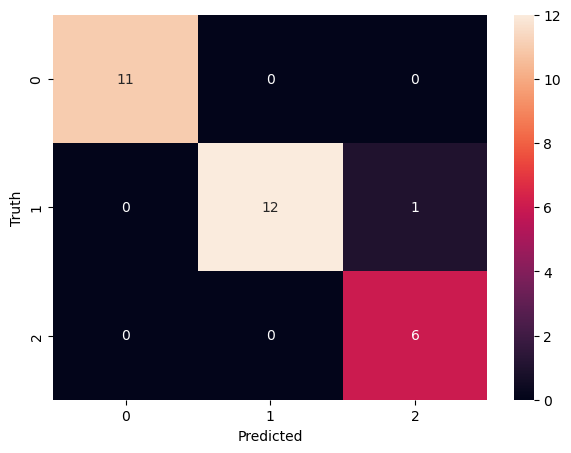

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Print classification report for precesion, recall and f1-score for each classes

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

